The first notebook "1 Create RIS from Query" collates the bibliometric data.

In this notebook we filter out unwanted records

In [1]:
%run "Common Setup.ipynb"

C:\Users\douglasd\AppData\Local\Continuum\miniconda3\envs\biblio\lib\site-packages\fuzzywuzzy-0.17.0-py3.6.egg\fuzzywuzzy\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [3]:
query_id = "e32d41cca6e1f29472c9cf16934e839b_1970-01-01-2019-06-30_ris"
RC = wosis.load_query_results("{}/{}.txt".format(CACHE_DIR, query_id))
num_records = []

In [4]:
corpora_df = wosis.rc_to_df(RC)
num_records.append(len(corpora_df.id))

In [5]:
filtered_df, removed = wosis.remove_empty_DOIs(corpora_df)
num_records.append(len(filtered_df.id))

Removing 3875 records with no DOIs


In [6]:
filtered_df, removed = wosis.remove_duplicates(filtered_df)
num_records.append(len(filtered_df.id))

Removing 5 duplicated records (identical DOIs)


In [7]:
# Check journal name for conference related names
remove_match = ["CONFERENCE", "WORKSHOP", "PROCEEDINGS", "SYMPOSIUM", "CONGRESS"]
filtered_df = wosis.remove_by_journals(filtered_df, remove_match)

# Check titles for conference related names
filtered_df = wosis.remove_by_title(filtered_df, remove_match)
num_records.append(len(filtered_df.id))

CONFERENCE: 806
WORKSHOP: 72
PROCEEDINGS: 69
SYMPOSIUM: 102
CONGRESS: 19
CONFERENCE: 0
WORKSHOP: 4
PROCEEDINGS: 0
SYMPOSIUM: 1
CONGRESS: 1


In [8]:
filtered_rc = wosis.extract_recs(filtered_df.id, RC)

In [9]:
# Save filtered collection to temporary directory
wosis.export_ris_file(filtered_rc, '{}/initial_filtered_corpora.txt'.format(CACHE_DIR))

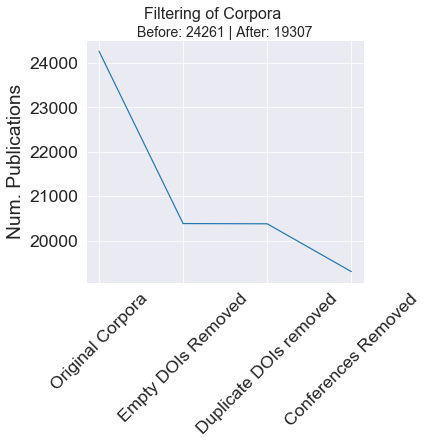

In [10]:
plt.figure(figsize=(6,6))
plt.tight_layout()
plt.suptitle('Filtering of Corpora', fontsize=16, y=1.02)
plt.title('Before: {} | After: {}'.format(len(RC), len(filtered_df.id)), fontsize=14, y=0.99)
plt.ylabel('Num. Publications')
plt.xticks(rotation=45)
reduction = plt.plot(['Original Corpora', 'Empty DOIs Removed', 'Duplicate DOIs removed', 'Conferences Removed'], num_records)
plt.tight_layout()
plt.savefig('{}/initial_filtering.png'.format(FIG_DIR), dpi=300, bbox_inches="tight")
